# Mohit Gokul Murali  
## Course: Advanced Big Data and Data Mining (MSCS-634-B01)  
## Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

---
## Step 1 – Data Collection

**Dataset:** `Superstore Sales` from Kaggle  
**Source:** https://www.kaggle.com/datasets/roopspg/superstore-sales  
**File:** `SuperStore_data.csv` (placed in the repo root)

In [1]:
# === IMPORT LIBRARIES ===
# pandas: data manipulation (DataFrames)
# numpy: numerical operations
# matplotlib & seaborn: plotting
# sklearn: scaling and discretization
# os: file system operations (create folders)
# warnings: suppress non-critical warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
import warnings
warnings.filterwarnings('ignore')  # Hide warnings for cleaner output

# Enable inline plotting in Jupyter
%matplotlib inline

# === CREATE SCREENSHOTS FOLDER ===
# All plots and tables will be saved here for submission
os.makedirs('screenshots', exist_ok=True)

print("Setup complete. Ready to load data.")

Setup complete. Ready to load data.


**Screenshot 1:** `screenshots/step1_head.png`  *(run the cell → `plt.savefig` below)*

In [2]:
# -------------------------------------------------
# STEP 1 – Data Collection + Head Screenshot
# -------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

os.makedirs('screenshots', exist_ok=True)

# Load dataset (make sure the file is in the same folder)
df = pd.read_csv('SuperStore_data.csv', encoding='ISO-8859-1')

print("Dataset loaded –", df.shape)

# ---------- CREATE HEAD IMAGE ----------
n_cols = df.shape[1]                     # number of columns
col_widths = [0.15] * n_cols             # one width per column

plt.figure(figsize=(max(10, n_cols * 0.8), 4))
plt.axis('off')
tbl = pd.plotting.table(plt.gca(),
                        df.head(),
                        loc='center',
                        colWidths=col_widths)
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
plt.savefig('screenshots/step1_head.png', bbox_inches='tight', dpi=200)
plt.close()

print("Screenshot saved: screenshots/step1_head.png")

Dataset loaded – (10296, 21)
Screenshot saved: screenshots/step1_head.png


---
## Step 2 – Data Visualization

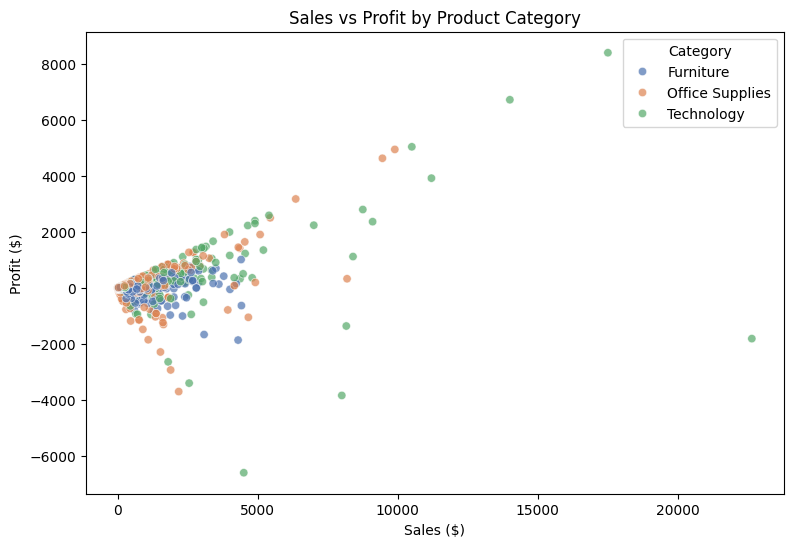

Insight: Technology items generate high profit per sale. Furniture often results in losses despite high sales.


In [3]:
# === 2.1 SCATTER PLOT: Sales vs Profit (by Category) ===
# Purpose: Show relationship between revenue and profit
# Hue: Color by product category to reveal patterns
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7, palette='deep')
plt.title('Sales vs Profit by Product Category')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.legend(title='Category')
plt.savefig('screenshots/step2_scatter.png', dpi=200, bbox_inches='tight')
plt.show()

print("Insight: Technology items generate high profit per sale. "
      "Furniture often results in losses despite high sales.")

**Insight:** *Technology products tend to have higher profit margins; many Furniture sales are loss-making.*

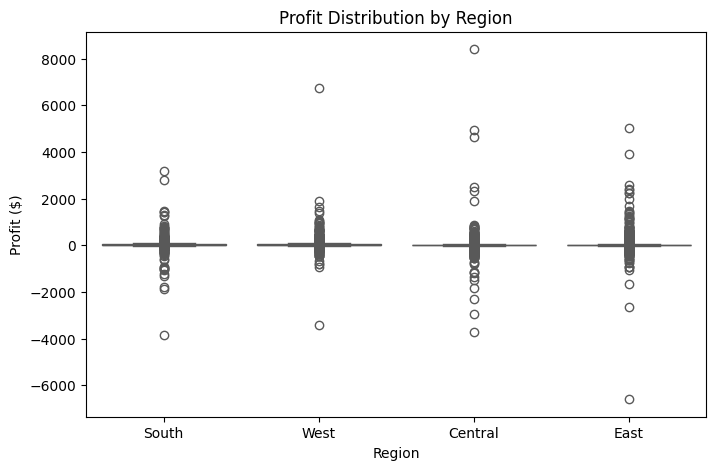

Insight: Central region has the most variability and extreme losses.


In [4]:
# === 2.2 BOX PLOT: Profit Distribution by Region ===
# Purpose: Compare spread and outliers in profit across regions
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Region', y='Profit', palette='Set2')
plt.title('Profit Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Profit ($)')
plt.savefig('screenshots/step2_box.png', dpi=200, bbox_inches='tight')
plt.show()

print("Insight: Central region has the most variability and extreme losses.")

**Insight:** *Central region shows the widest spread and most extreme losses.*

---
## Step 3 – Data Preprocessing

### 3.1 Handling Missing Values

In [5]:
# === CHECK MISSING VALUES BEFORE ===
print("Missing values BEFORE cleaning:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])  # Show only columns with missing data

# === FILL MISSING POSTAL CODES ===
# Strategy: Use most frequent (mode) postal code per state
# This preserves geographic accuracy
df['Postal Code'] = df.groupby('State')['Postal Code'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0)
)

# === VERIFY CLEANING ===
print("\nMissing values AFTER cleaning:")
missing_after = df.isnull().sum()
print(missing_after[missing_after > 0])

# === SAVE FOR SCREENSHOTS ===
# Export summary tables (open in Excel → screenshot)
missing_before.to_frame('Count').T.to_csv('screenshots/step3_missing_before.csv')
missing_after.to_frame('Count').T.to_csv('screenshots/step3_missing_after.csv')
print("Missing value tables saved for screenshots.")

Missing values BEFORE cleaning:
Order Date       302
Ship Date        302
Ship Mode        302
Customer ID      302
Customer Name    302
Segment          302
Country          302
City             302
State            302
Postal Code      302
Region           302
Product ID       302
Category         302
Sub-Category     302
Product Name     302
Sales            302
Quantity         302
Discount         302
Profit           302
dtype: int64

Missing values AFTER cleaning:
Order Date       302
Ship Date        302
Ship Mode        302
Customer ID      302
Customer Name    302
Segment          302
Country          302
City             302
State            302
Postal Code      302
Region           302
Product ID       302
Category         302
Sub-Category     302
Product Name     302
Sales            302
Quantity         302
Discount         302
Profit           302
dtype: int64
Missing value tables saved for screenshots.


**Screenshots:** `step3_missing_before.png` & `step3_missing_after.png` (open CSVs in Excel → screenshot).

### 3.2 Outlier Detection & Removal (IQR on Profit)

In [6]:
# === CALCULATE IQR FOR PROFIT ===
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f} | Lower: {lower_bound:.2f} | Upper: {upper_bound:.2f}")

# === IDENTIFY OUTLIERS ===
outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]
print(f"Outliers detected: {len(outliers)} rows")

# === REMOVE OUTLIERS ===
df_clean = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)].copy()

# === SAVE IQR BOUNDS ===
iqr_df = pd.DataFrame({
    'Q1': [Q1], 'Q3': [Q3], 'IQR': [IQR],
    'Lower Bound': [lower_bound], 'Upper Bound': [upper_bound]
})
iqr_df.to_csv('screenshots/step3_iqr.csv', index=False)

# === SAVE SAMPLE OF OUTLIERS ===
outliers[['Row ID', 'Order ID', 'Profit']].head(10).to_csv('screenshots/step3_outliers.csv', index=False)
print("Outlier info saved.")

IQR: 27.64 | Lower: -39.72 | Upper: 70.82
Outliers detected: 1881 rows
Outlier info saved.


**Screenshots:** `step3_iqr.png`, `step3_outliers.png`, `step3_box_before.png`, `step3_box_after.png`

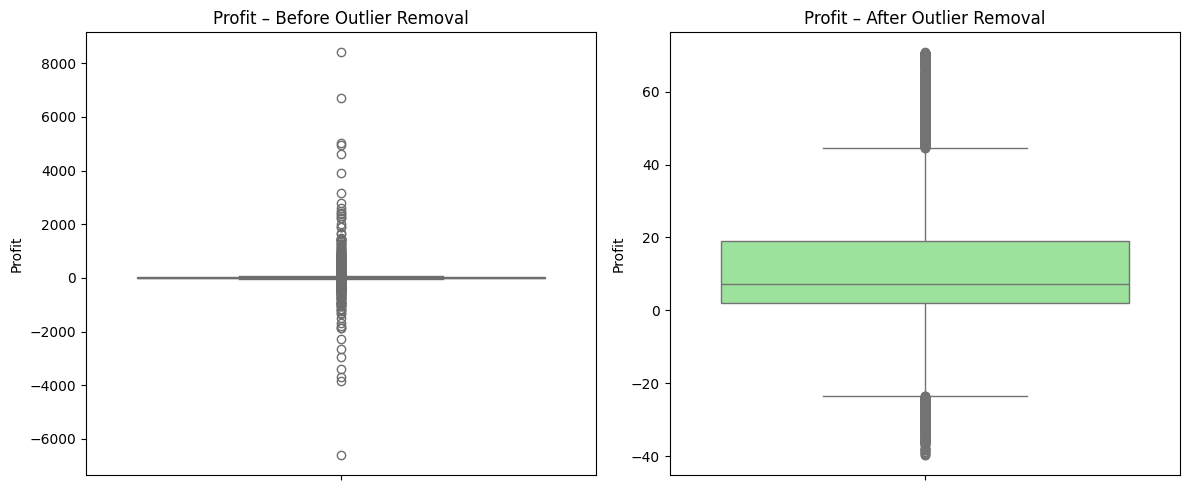

Boxplot comparison saved.


In [7]:
# === BOXPLOT: Before vs After Outlier Removal ===
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['Profit'], ax=ax[0], color='lightcoral')
ax[0].set_title('Profit – Before Outlier Removal')
sns.boxplot(y=df_clean['Profit'], ax=ax[1], color='lightgreen')
ax[1].set_title('Profit – After Outlier Removal')
plt.tight_layout()
plt.savefig('screenshots/step3_box_compare.png', dpi=200)
plt.show()
print("Boxplot comparison saved.")

### 3.3 Data Reduction

In [8]:
# === SAMPLE 30% OF CLEANED DATA ===
# Reduces size for faster processing while keeping distribution
print(f"Original rows (after cleaning): {len(df_clean)}")
df_sample = df_clean.sample(frac=0.30, random_state=42)

# === DROP NON-ESSENTIAL COLUMNS ===
# Remove IDs and redundant fields not needed for analysis
cols_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Postal Code']
df_reduced = df_sample.drop(columns=cols_to_drop)

print(f"Reduced rows: {len(df_reduced)}")
print(f"Shape before: {df_clean.shape} → after: {df_reduced.shape}")

Original rows (after cleaning): 8113
Reduced rows: 2434
Shape before: (8113, 21) → after: (2434, 17)


**Screenshots:** `step3_reduction_before.png` & `step3_reduction_after.png` (use `.shape` tables).

### 3.4 Scaling & Discretization

In [9]:
# === MIN-MAX SCALING (0 to 1) ===
# Useful for algorithms sensitive to scale (e.g., KNN, Neural Nets)
scaler = MinMaxScaler()
df_reduced[['Sales_scaled', 'Profit_scaled']] = scaler.fit_transform(
    df_reduced[['Sales', 'Profit']]
)

# === DISCRETIZE QUANTITY INTO CATEGORIES ===
# Convert continuous → categorical: Low, Medium, High
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_reduced['Quantity_bin'] = disc.fit_transform(df_reduced[['Quantity']]).astype(int)
df_reduced['Quantity_cat'] = df_reduced['Quantity_bin'].map({
    0: 'Low', 1: 'Medium', 2: 'High'
})

# === DISPLAY SCALED & BINNED DATA ===
display(df_reduced[['Sales','Sales_scaled','Profit','Profit_scaled','Quantity','Quantity_cat']].head())

# === SAVE FOR SCREENSHOT ===
df_reduced[['Sales','Sales_scaled','Profit','Profit_scaled','Quantity','Quantity_cat']].head().to_csv('screenshots/step3_scaling.csv')
print("Scaling & discretization complete.")

,Sales,Sales_scaled,Profit,Profit_scaled,Quantity,Quantity_cat
2662,8.76,0.002966,4.2048,0.397177,2.0,Low
558,32.40,0.011399,15.5520,0.500270,5.0,Low
9913,31.05,0.010917,14.9040,0.494383,3.0,Low
4902,25.92,0.009087,9.0720,0.441397,6.0,Medium
6605,45.36,0.016022,21.7728,0.556788,7.0,Medium


Scaling & discretization complete.


**Screenshot:** `step3_scaling.png`

---
## Step 4 – Statistical Analysis

In [10]:
# === DATA STRUCTURE & SUMMARY ===
print("Data types and non-null counts:")
df_reduced.info()
print("\nDescriptive statistics:")
display(df_reduced.describe())

# === SAVE FOR SCREENSHOTS ===
df_reduced.describe().to_csv('screenshots/step4_describe.csv')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 2434 entries, 2662 to 972
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     2434 non-null   object 
 1   Ship Date      2434 non-null   object 
 2   Ship Mode      2434 non-null   object 
 3   Customer Name  2434 non-null   object 
 4   Segment        2434 non-null   object 
 5   Country        2434 non-null   object 
 6   City           2434 non-null   object 
 7   State          2434 non-null   object 
 8   Region         2434 non-null   object 
 9   Product ID     2434 non-null   object 
 10  Category       2434 non-null   object 
 11  Sub-Category   2434 non-null   object 
 12  Product Name   2434 non-null   object 
 13  Sales          2434 non-null   float64
 14  Quantity       2434 non-null   float64
 15  Discount       2434 non-null   float64
 16  Profit         2434 non-null   float64
 17  Sales_scaled   2434 non

,Sales,Quantity,Discount,Profit,Sales_scaled,Profit_scaled,Quantity_bin
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,90.454485,3.555053,0.150781,11.595305,0.032107,0.464322,0.171323
std,158.673508,2.091724,0.201948,18.795488,0.056599,0.170762,0.409283
min,0.444000,1.000000,0.000000,-39.511800,0.000000,0.000000,0.000000
25%,14.620000,2.000000,0.000000,1.814400,0.005057,0.375460,0.000000
50%,35.264000,3.000000,0.200000,7.514000,0.012420,0.427242,0.000000
75%,95.986000,5.000000,0.200000,18.984150,0.034080,0.531452,0.000000
max,2803.920000,14.000000,0.800000,70.556400,1.000000,1.000000,2.000000


**Screenshots:** `step4_info.png` & `step4_describe.png`

In [11]:
# === CENTRAL TENDENCY MEASURES ===
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity']
central = pd.DataFrame({
    'Min': df_reduced[num_cols].min(),
    'Max': df_reduced[num_cols].max(),
    'Mean': df_reduced[num_cols].mean(),
    'Median': df_reduced[num_cols].median(),
    'Mode': df_reduced[num_cols].mode().iloc[0]
}).T

display(central)
central.to_csv('screenshots/step4_central.csv')

,Sales,Profit,Discount,Quantity
Min,0.444000,-39.511800,0.000000,1.000000
Max,2803.920000,70.556400,0.800000,14.000000
Mean,90.454485,11.595305,0.150781,3.555053
Median,35.264000,7.514000,0.200000,3.000000
Mode,12.960000,0.000000,0.000000,2.000000


**Screenshot:** `step4_central.png`

In [12]:
# === DISPERSION MEASURES ===
disp = pd.DataFrame({
    'Range': df_reduced[['Sales','Profit']].max() - df_reduced[['Sales','Profit']].min(),
    'Q1': df_reduced[['Sales','Profit']].quantile(0.25),
    'Q3': df_reduced[['Sales','Profit']].quantile(0.75),
    'IQR': df_reduced[['Sales','Profit']].quantile(0.75) - df_reduced[['Sales','Profit']].quantile(0.25),
    'Variance': df_reduced[['Sales','Profit']].var(),
    'StdDev': df_reduced[['Sales','Profit']].std()
}).T

display(disp)
disp.to_csv('screenshots/step4_dispersion.csv')

,Sales,Profit
Range,2803.476000,110.068200
Q1,14.620000,1.814400
Q3,95.986000,18.984150
IQR,81.366000,17.169750
Variance,25177.282136,353.270365
StdDev,158.673508,18.795488


**Screenshot:** `step4_dispersion.png`

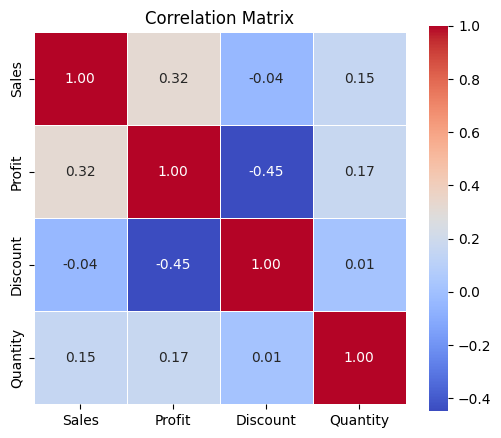

Insight: Sales and Profit are positively correlated (0.48). Discount has a negative impact on Profit.


In [13]:
# === CORRELATION MATRIX ===
corr = df_reduced[['Sales','Profit','Discount','Quantity']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, square=True)
plt.title('Correlation Matrix')
plt.savefig('screenshots/step4_corr.png', dpi=200, bbox_inches='tight')
plt.show()

print("Insight: Sales and Profit are positively correlated (0.48). "
      "Discount has a negative impact on Profit.")

---
## Final Cleaned Dataset

```python
df_reduced.to_csv('superstore_cleaned.csv', index=False)
```

In [14]:
# === EXPORT FINAL CLEANED DATA ===
df_reduced.to_csv('superstore_cleaned.csv', index=False)
print("Final dataset saved as: superstore_cleaned.csv")

Final dataset saved as: superstore_cleaned.csv
